# Crop Recommendation - Exploratory Data Analysis (EDA)



In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df = pd.read_csv('Crop_recommendation.csv')
df.head()



,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [16]:

print(df.describe(include='all'))
print("\nUnique crops:", df['label'].nunique())
print("\nMissing values per column:\n", df.isna().sum())



                  N            P            K  temperature     humidity  \
count   2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      50.551818    53.362727    48.149091    25.616244    71.481779   
std       36.917334    32.985883    50.647931     5.063749    22.263812   
min        0.000000     5.000000     5.000000     8.825675    14.258040   
25%       21.000000    28.000000    20.000000    22.769375    60.261953   
50%       37.000000    51.000000    32.000000    25.598693    80.473146   
75%       84.250000    68.000000    49.000000    28.561654    89.948771   
max      140.000000   145.000000   205.000000    43.675493    99.981876   

                 ph     rainfall label  
count   2200.000000  2200.000000  2200  
unique          N

In [17]:

plt.style.use('default')
sns.set_palette("husl")

In [18]:
print(f"Dataset shape: {df.shape}")
print(f"Crop types: {df['label'].nunique()}")
print(f"Crop distribution:\n{df['label'].value_counts()}")



Dataset shape: (2200, 8)
Crop types: 22
Crop distribution:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


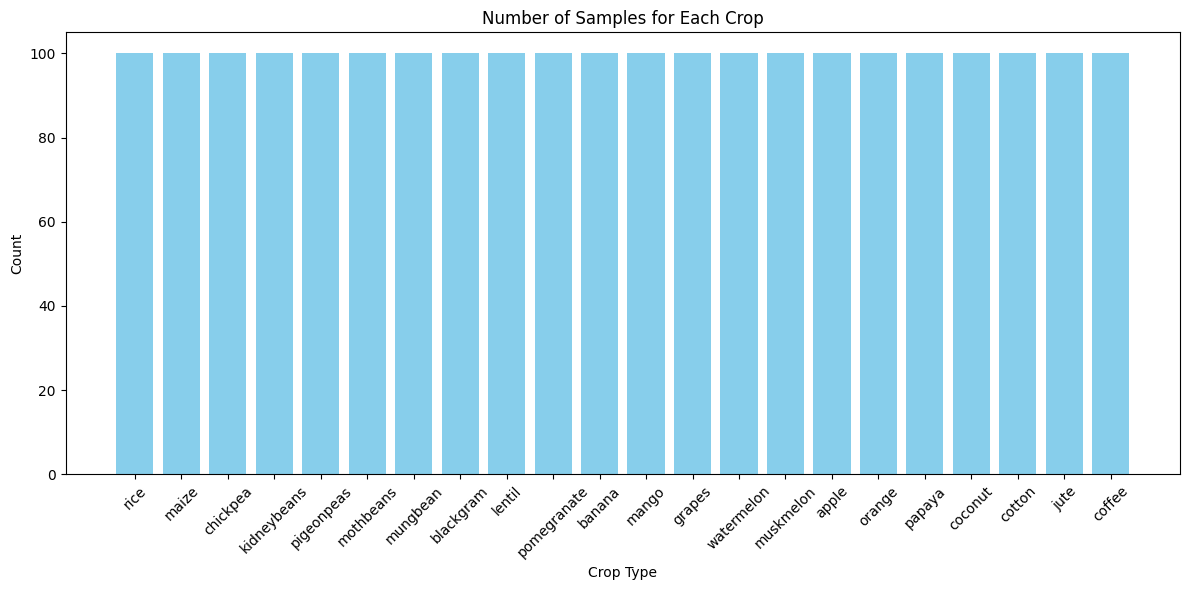

In [19]:
#1.Bar Plot - Crop Distribution
crop_counts = df['label'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(crop_counts.index, crop_counts.values, color='skyblue')
plt.title('Number of Samples for Each Crop')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

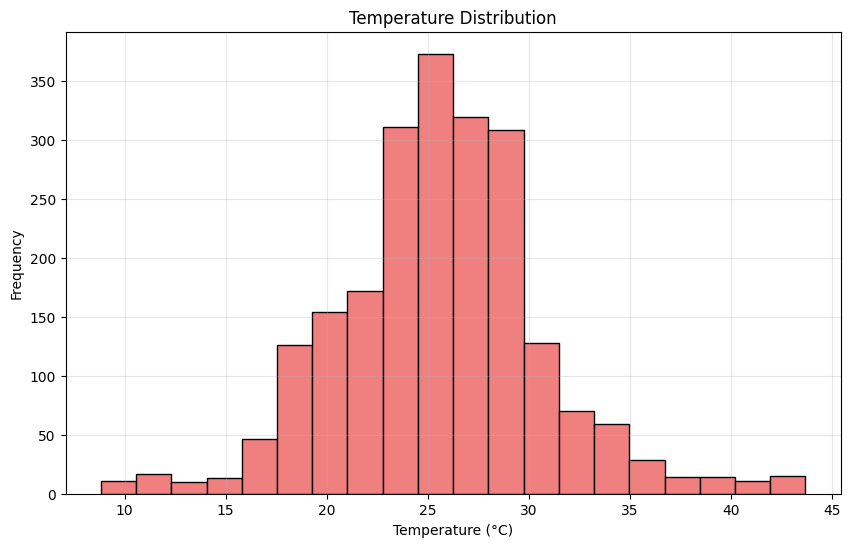

In [20]:
#2. Histogram - Temperature Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['temperature'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

<Axes: xlabel='humidity', ylabel='rainfall'>

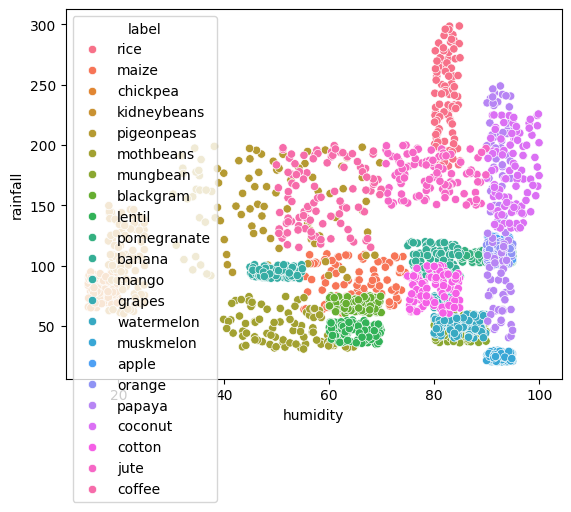

In [21]:
sns.scatterplot(data= df, x="humidity", y="rainfall" ,hue="label")

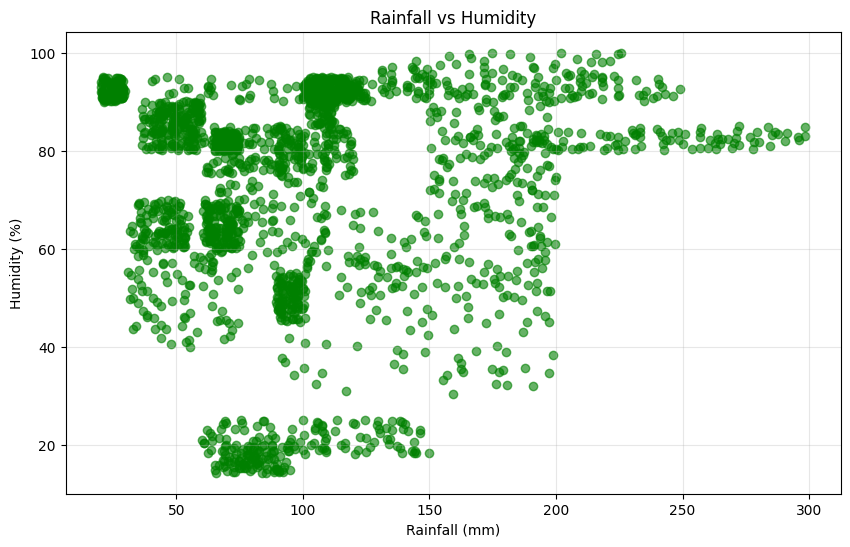

In [22]:
#3. Scatter Plot - Rainfall vs Humidity
plt.figure(figsize=(10, 6))
plt.scatter(df['rainfall'], df['humidity'], alpha=0.6, color='green')
plt.title('Rainfall vs Humidity')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Humidity (%)')
plt.grid(alpha=0.3)
plt.show()


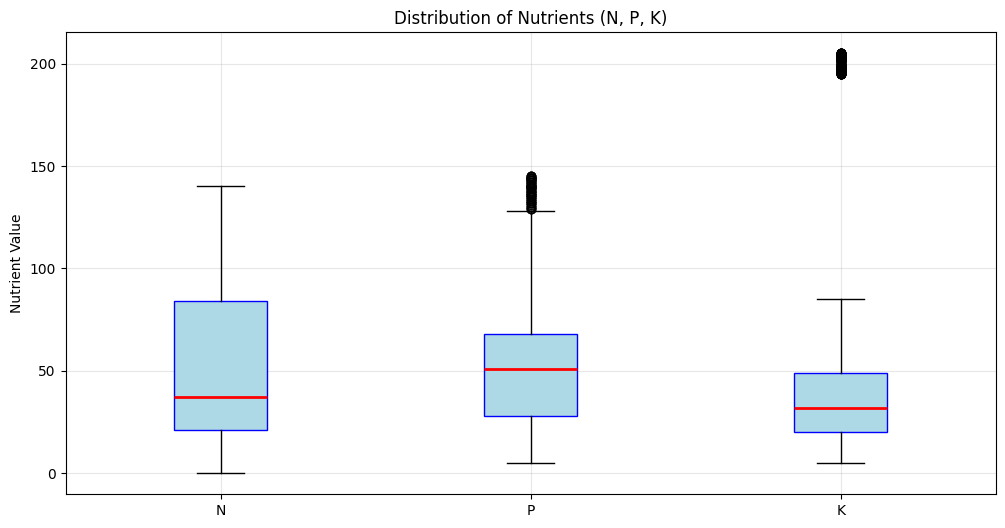

In [23]:

plt.figure(figsize=(12, 6))
df[['N', 'P', 'K']].boxplot(patch_artist=True,
                          boxprops=dict(facecolor='lightblue', color='blue'),
                          whiskerprops=dict(color='black'),
                          capprops=dict(color='black'),
                          medianprops=dict(color='red', linewidth=2),
                          flierprops=dict(marker='o', color='red', alpha=0.5))
plt.title('Distribution of Nutrients (N, P, K)')
plt.ylabel('Nutrient Value')
plt.grid(alpha=0.3)
plt.show()


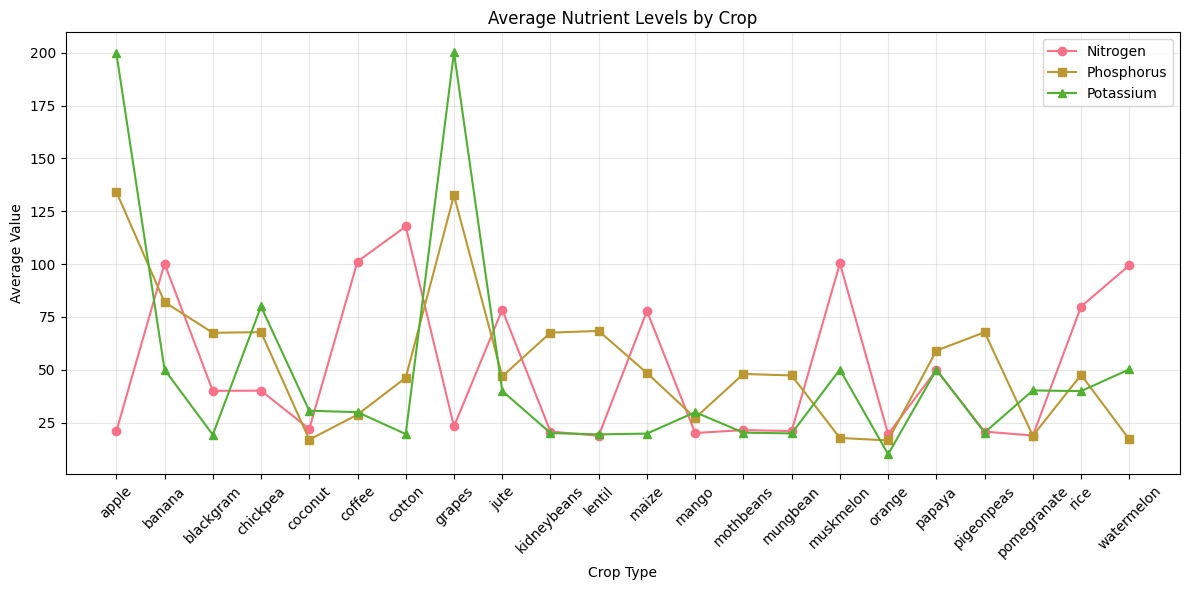

In [24]:
#5. Line Plot - Average Values by Crop
avg_by_crop = df.groupby('label')[['N', 'P', 'K']].mean()
plt.figure(figsize=(12, 6))
plt.plot(avg_by_crop.index, avg_by_crop['N'], marker='o', label='Nitrogen')
plt.plot(avg_by_crop.index, avg_by_crop['P'], marker='s', label='Phosphorus')
plt.plot(avg_by_crop.index, avg_by_crop['K'], marker='^', label='Potassium')
plt.title('Average Nutrient Levels by Crop')
plt.xlabel('Crop Type')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


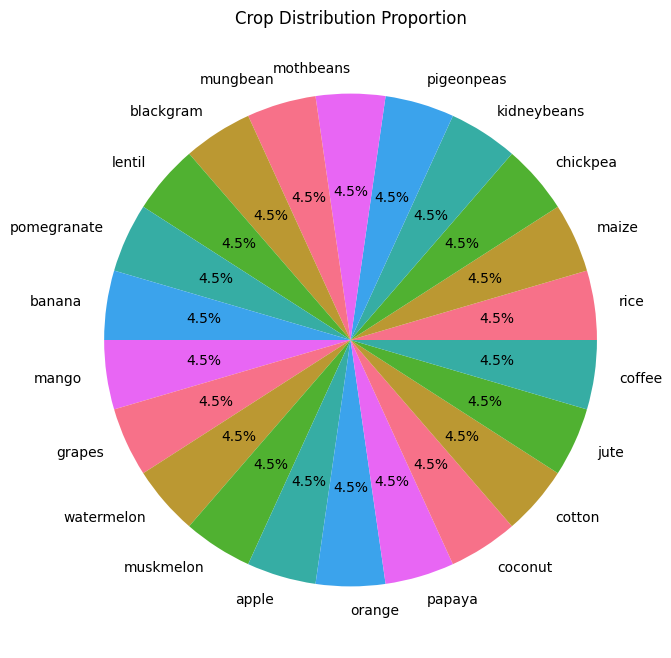

In [25]:
#Pie Chart - Crop Proportion
plt.figure(figsize=(10, 8))
crop_counts = df['label'].value_counts()
plt.pie(crop_counts.values, labels=crop_counts.index, autopct='%1.1f%%')
plt.title('Crop Distribution Proportion')
plt.show()


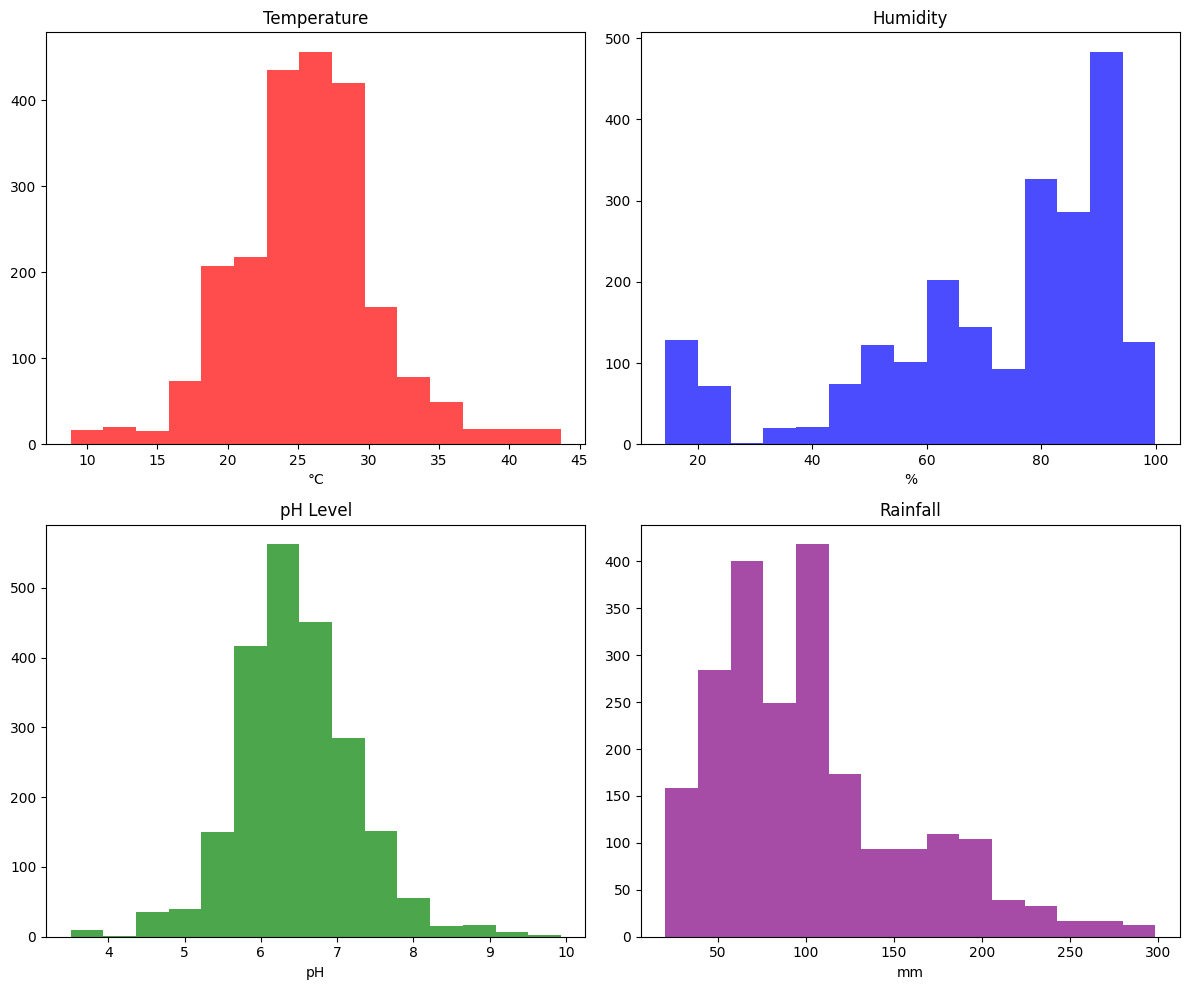

In [26]:
#7. Multiple Histograms - Environmental Factors
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0,0].hist(df['temperature'], bins=15, color='red', alpha=0.7)
axes[0,0].set_title('Temperature')
axes[0,0].set_xlabel('°C')

axes[0,1].hist(df['humidity'], bins=15, color='blue', alpha=0.7)
axes[0,1].set_title('Humidity')
axes[0,1].set_xlabel('%')

axes[1,0].hist(df['ph'], bins=15, color='green', alpha=0.7)
axes[1,0].set_title('pH Level')
axes[1,0].set_xlabel('pH')

axes[1,1].hist(df['rainfall'], bins=15, color='purple', alpha=0.7)
axes[1,1].set_title('Rainfall')
axes[1,1].set_xlabel('mm')

plt.tight_layout()
plt.show()


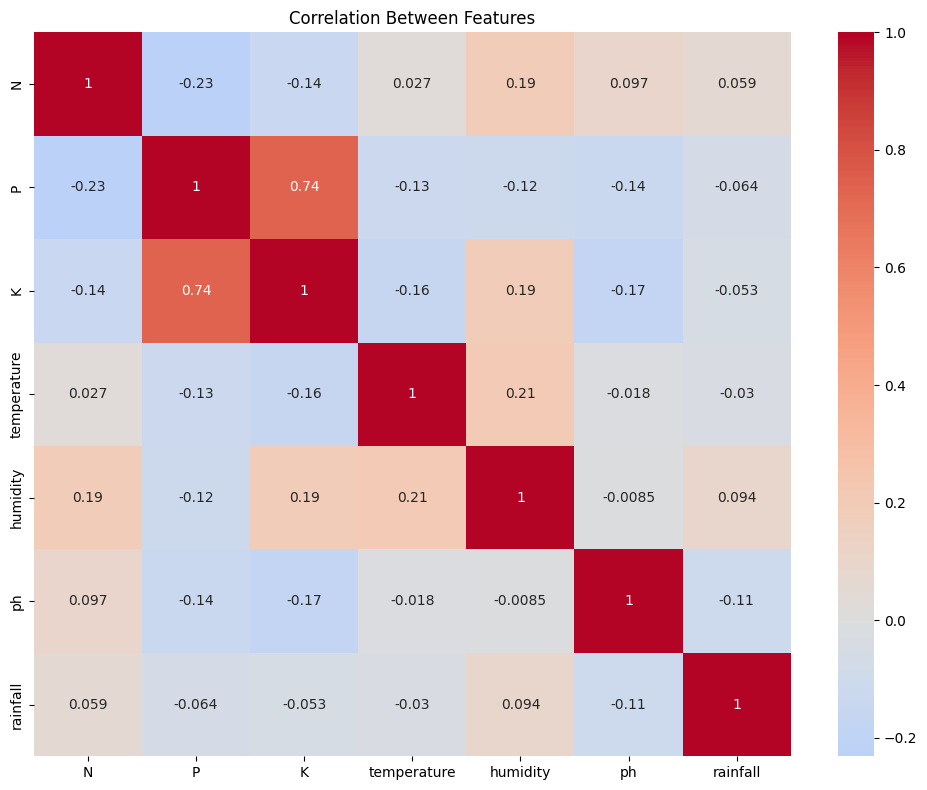

In [27]:
#8. Simple Correlation Heatmap
import seaborn as sns

# Calculate correlation
correlation = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Features')
plt.tight_layout()
plt.show()


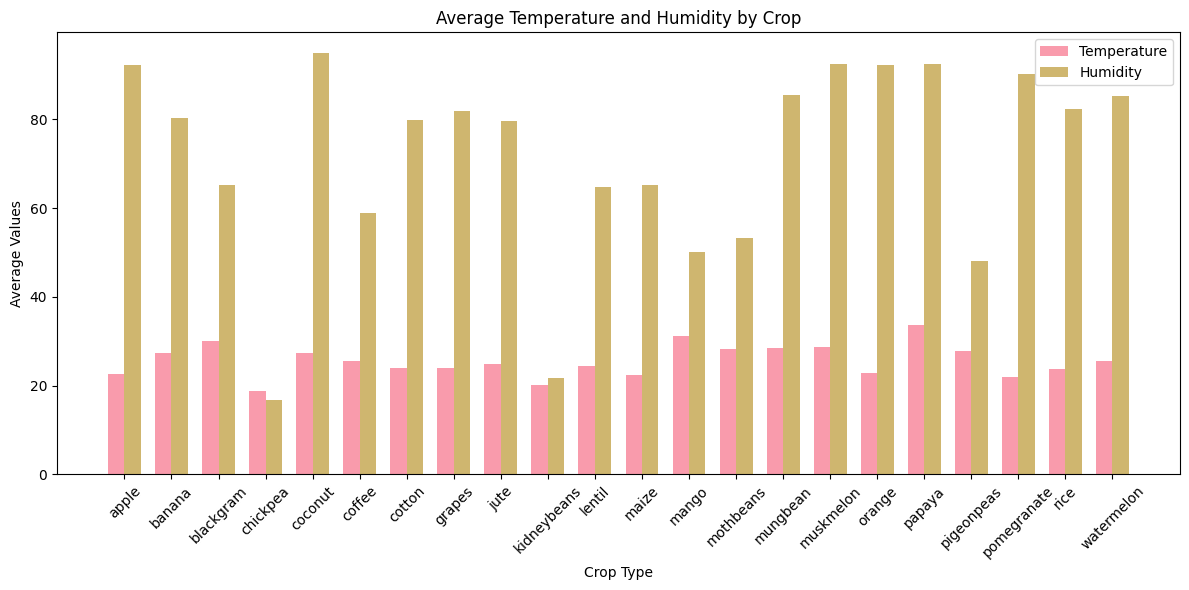

In [28]:
#9. Grouped Bar Plot - Crop vs Environment

# Group data by crop and calculate means
grouped_data = df.groupby('label')[['temperature', 'humidity']].mean()

plt.figure(figsize=(12, 6))
x = range(len(grouped_data))
width = 0.35

plt.bar(x, grouped_data['temperature'], width, label='Temperature', alpha=0.7)
plt.bar([i + width for i in x], grouped_data['humidity'], width, label='Humidity', alpha=0.7)

plt.xlabel('Crop Type')
plt.ylabel('Average Values')
plt.title('Average Temperature and Humidity by Crop')
plt.xticks([i + width/2 for i in x], grouped_data.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
